In [1]:
from utils.data_preparation import prepare_dataset

train, val, test = prepare_dataset()

Loading of the train-clean-100 subset...
Loading of the train-clean-100 subset completed.
Volumes - Train: 0.6 | Val: 0.2 | Test: 0.2


In [4]:
from utils.visualize import Visualizer

viz = Visualizer()


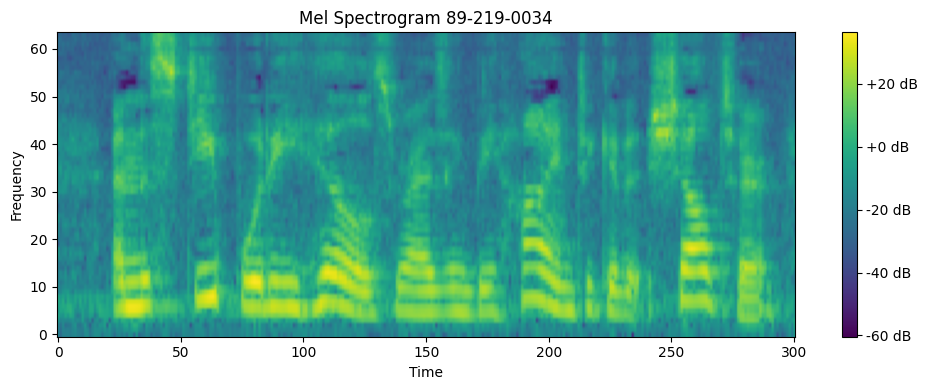

In [3]:
i = 0

feature, _ = train[i]

plot_label = train.get_path(i).split('\\')[-1].split('.')[0]
viz.visualize_features(feature, label=plot_label)

In [ ]:
from train import train_model

model, train_metrics, val_metrics, history, y_true, y_pred = train_model(train, val, epoch_details=False)
val_metrics

Using device: cpu
Loading of the train-clean-100 subset...
Loading of the train-clean-100 subset completed.
Volumes - Train: 0.6 | Val: 0.2 | Test: 0.2


Training: 100%|██████████| 20/20 [03:08<00:00,  9.43s/epoch]

Training completed.


{'accuracy': 0.7666666666666667,
 'precision': 0.7975,
 'recall': 0.7666666666666667,
 'f1': 0.7495454545454545}

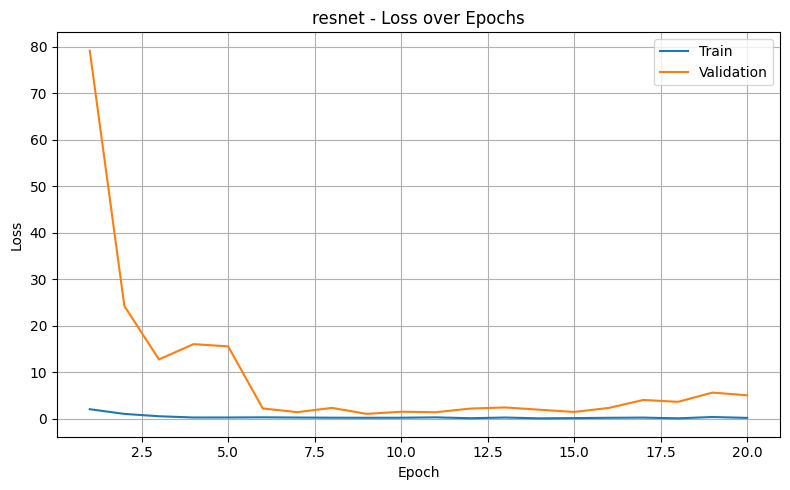

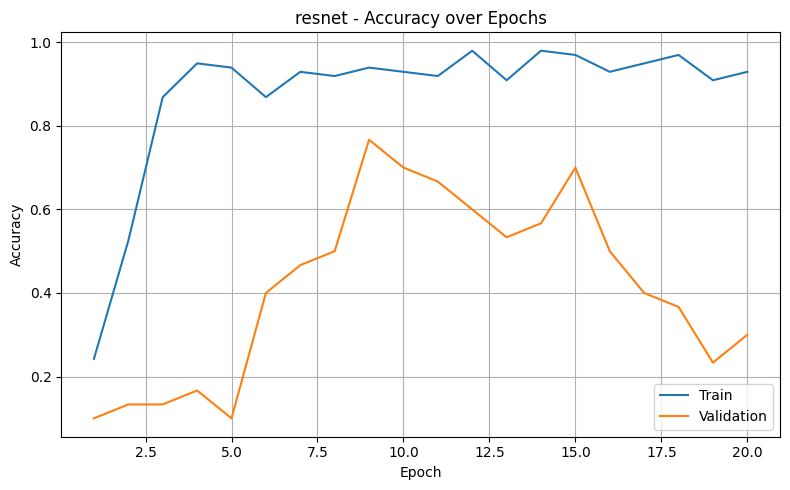

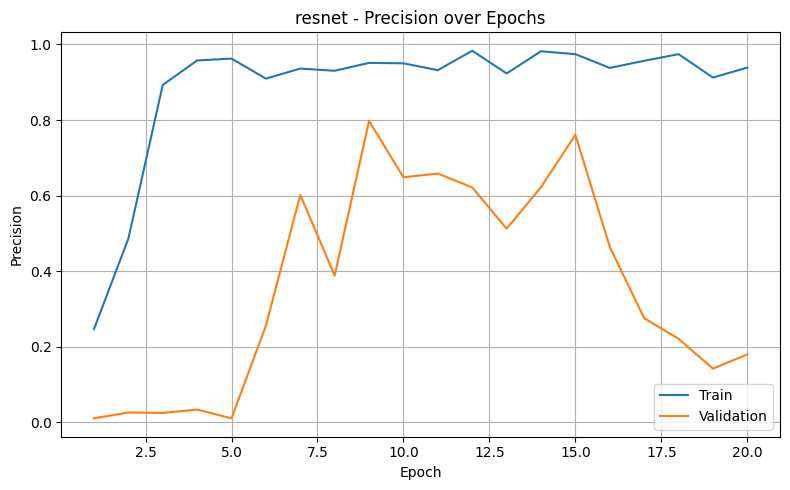

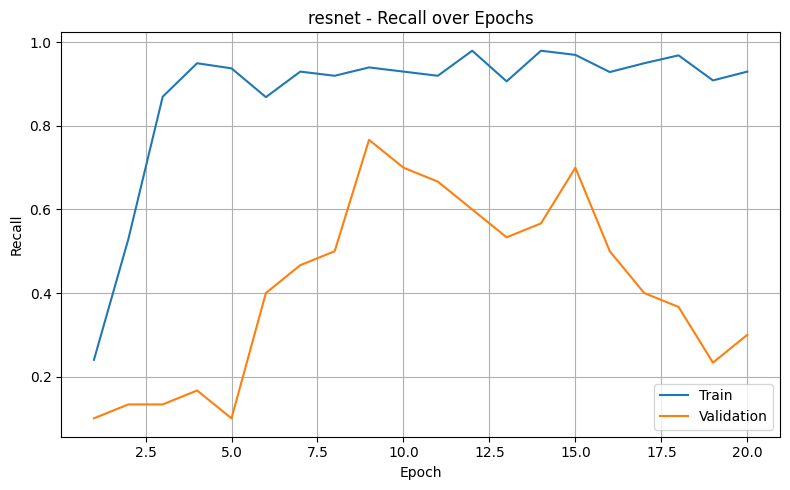

In [5]:
from config import config

viz.plot_training_history(history, metrics=["loss", "accuracy", "precision", "recall"], title_prefix=f"{config['model_type']} - ")

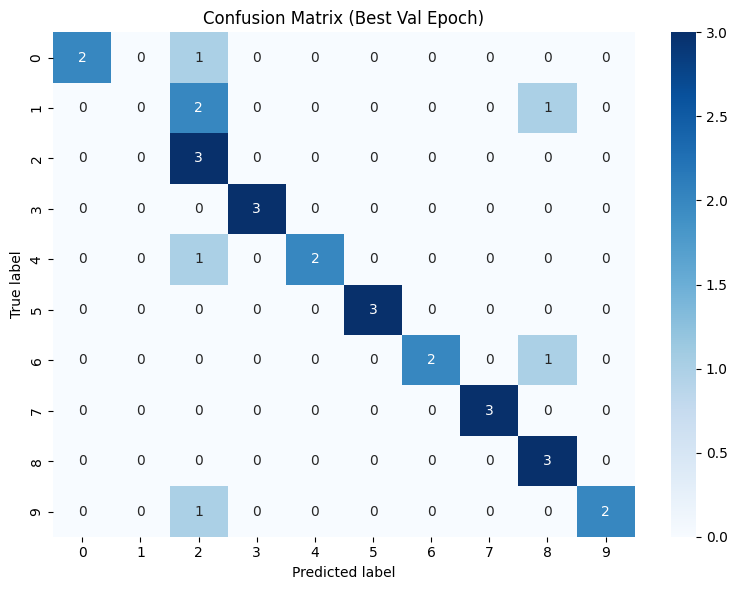

In [6]:
# Visualisation de la matrice de confusion
viz.plot_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    class_names=[str(i) for i in range(config['num_speakers'])],
    title="Confusion Matrix (Best Val Epoch)"
)

In [ ]:
from utils.data_preparation import generate_kfold_dataloaders
from utils.visualize import Visualizer
from config import config

folds = generate_kfold_dataloaders(k=config["k_folds"], batch_size=config["batch_size"])
train, val = folds[0]
feature, label = train[0]

viz = Visualizer()

viz.visualize_features(feature)



Loading of the train-clean-100 subset...


In [ ]:
from train import train_model

all_val_metrics = []
all_val_histories = []

for i, (train_loader, val_loader) in enumerate(folds):
    print(f"\nFold {i + 1}/{config['k_folds']}")
    model, train_metrics, val_metrics, history, y_true, y_pred = train_model(
        train_set=train_loader,
        val_set=val_loader,
        epoch_details=False
    )
    all_val_metrics.append(val_metrics)
    all_val_histories.append(history)



Fold 1/2
Using device: cpu


Training: 100%|██████████| 10/10 [00:48<00:00,  4.90s/epoch]


Training completed.

Fold 2/2
Using device: cpu


Training: 100%|██████████| 10/10 [00:54<00:00,  5.44s/epoch]

Training completed.


In [ ]:
from evaluate import average_kfold_metrics, average_kfold_history

average_kfold_metrics(all_val_metrics)
all_val_histories
avg_history = average_kfold_history(all_val_histories)
avg_history


{'avg-train_loss': [2.312687218286553,
  0.9729439114064586,
  0.21000375587113052,
  0.06828210126532584,
  0.042645702469257675,
  0.018712958814006073,
  0.00955113444325267,
  0.007478579483090006,
  0.005054601350114965,
  0.005216105921878194],
 'avg-val_loss': [156.26679959978375,
  33.39288515519123,
  45.3908284961934,
  33.58947680882045,
  19.168559217258377,
  13.556277146242103,
  9.796185837959756,
  7.057473089354379,
  5.172253822599139,
  3.8430772161483766],
 'avg-train_accuracy': [0.16142857142857142,
  0.7257142857142858,
  0.9797959183673469,
  1.0,
  0.99,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'avg-val_accuracy': [0.07061224489795918,
  0.12122448979591836,
  0.09061224489795919,
  0.09061224489795919,
  0.10081632653061223,
  0.1110204081632653,
  0.14122448979591837,
  0.18142857142857144,
  0.2416326530612245,
  0.2618367346938776],
 'avg-train_f1': [0.12401844943427093,
  0.670987345987346,
  0.9743434343434344,
  1.0,
  0.989010989010989,
  1.0,
  1.0,
  1.0,


In [ ]:
viz.plot_training_history(avg_history, metrics=["loss", "accuracy", "precision", "recall"], title_prefix=f"{config['model_type']} - ")

KeyError: 'train_loss'